In [107]:
# third party
from sklearn.metrics import auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt 

import matplotlib as mpl

# local 
from delta_score import compute_delta_score, compute_sample_coverage, plot_sample_coverage

from utils import set_fig_size, set_arrowed_spines, format_axis

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


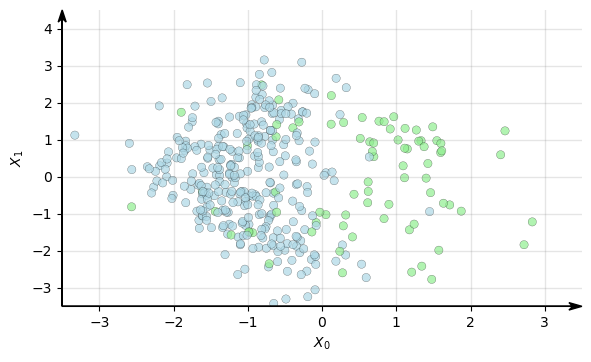

In [214]:
# illustration of synthetic data
X, y = make_classification(n_samples=400, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, 
                           weights=(0.85, 0.15), flip_y=0.1, class_sep=1, hypercube=True, 
                           shift=0.0, scale=1.0, shuffle=True, random_state=42)

fig, axis = plt.subplots(1, 1, figsize=set_fig_size(435))
axis.scatter(X[:, 0], X[:, 1], c=y, cmap=mpl.colors.ListedColormap(["lightblue", "lightgreen"]), 
             alpha=0.7, edgecolors="k", linewidth=0.2)
format_axis(axis, fig, xlim=(-3.5, 3.5), ylim=(-3.5, 4.5), n_xticks=6, xlabel=r"$X_0$", ylabel=r"$X_1$", 
            grid=True, arrowed_spines=True)
fig.tight_layout()
fig.savefig("figures/data_imbalanced.png", transparent=True, bbox_inches="tight")

In [212]:
# train-test splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# fit prediction model  
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

p_pred = clf.predict_proba(X_test)

# post-process model output 
ohe = OneHotEncoder()
y_test_ohe = ohe.fit_transform(y_test.reshape(-1, 1)).toarray()

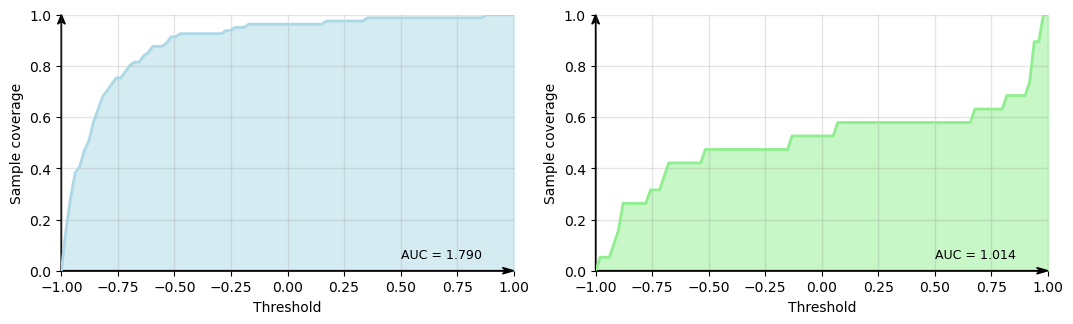

In [215]:
fig, axes = plt.subplots(1, 2, figsize=set_fig_size(435 * 1.5, fraction=1.2, subplots=(1, 2)))

mask_c0 = y_test_ohe[:, 0] == 1

# plot sample coverage 
#fig, axis = plt.subplots(1, 1, figsize=set_fig_size(435))
axis0 = plot_sample_coverage(axes[0], y_test_ohe[mask_c0], p_pred[mask_c0], n_thresholds=100, color="lightblue")
format_axis(axes[0], fig, xlim=(-1, 1), ylim=(0, 1), n_xticks=6, xlabel="Threshold", ylabel="Sample coverage", 
            grid=True, arrowed_spines=True)

mask_c1 = y_test_ohe[:, 1] == 1

axis1 = plot_sample_coverage(axes[1], y_test_ohe[mask_c1], p_pred[mask_c1], n_thresholds=100, color="lightgreen")
format_axis(axes[1], fig, xlim=(-1, 1), ylim=(0, 1), n_xticks=6, xlabel="Threshold", ylabel="Sample coverage", 
            grid=True, arrowed_spines=True)

fig.tight_layout()
fig.savefig("figures/delta_scores_imbalanced.png", transparent=True, bbox_inches="tight")